<a href="https://colab.research.google.com/github/Priyam8210/CyberLab/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
l_train_data=np.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Linear_train.csv"))
l_test_data= np.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Linear_test.csv"))
print(l_train_data.shape)
print(l_test_data.shape)


(50000, 22)
(10000, 22)


In [ ]:
#X = l_train_data[:, 2:22]
#Y = l_train_data[:, 21]
X = l_train_data[:, 1:21]
Y = l_train_data[:, 21]
X_test = l_test_data[:, 1:21]
Y_test = l_test_data[:,21]


print(X.shape)
print(X_test.shape)

Y.shape = (50000, 1)
Y_test.shape = (10000, 1)

print(Y.shape)
print(Y_test.shape)




(50000, 20)
(10000, 20)
(50000, 1)
(10000, 1)


In [ ]:
# Mean Normalization
def M_regularisation(a):
  Mean_colm = np.mean(a, axis =0)
  std_dev = np.std(a, axis=0)
  a = (a - Mean_colm)/std_dev
  return a

X = M_regularisation(X)
X_test = M_regularisation(X_test)
print(Y)

[[  311.23249087]
 [ 6393.11234169]
 [ 2601.04622323]
 ...
 [ 1483.91702162]
 [10720.1391803 ]
 [ 2185.12795794]]


In [ ]:
print(X)

[[-0.34799407  0.22031433  0.28511282 ... -0.15582334  1.0052814
   1.00876462]
 [-0.61114616  0.19984917  0.42713042 ...  1.29439989  0.44683234
  -1.12340336]
 [-0.98256011 -0.67757616 -1.23346387 ... -0.20664643  0.52015407
  -1.18447479]
 ...
 [-0.924919   -1.45426802  0.68461602 ...  0.8468317   0.41256961
  -1.21414073]
 [ 1.71021016 -0.28618815  0.51544114 ... -0.95334269  1.31811777
  -0.36359261]
 [-0.90157434  0.61791579 -1.20074042 ... -1.63664414 -0.1163058
  -1.67297842]]


In [ ]:
m1 = len(X)
m2 = len(X_test)

X = np.concatenate((np.ones((m1,1)), X), axis=1)
X_test = np.concatenate((np.ones((m2,1)), X_test), axis=1)

n= np.size(X,1)
theata= np.ones((n, 1))

print(n)
print(np.size(X,1))
print(np.size(X_test,1))


21
21
21


In [ ]:
print(X)

[[ 1.         -0.34799407  0.22031433 ... -0.15582334  1.0052814
   1.00876462]
 [ 1.         -0.61114616  0.19984917 ...  1.29439989  0.44683234
  -1.12340336]
 [ 1.         -0.98256011 -0.67757616 ... -0.20664643  0.52015407
  -1.18447479]
 ...
 [ 1.         -0.924919   -1.45426802 ...  0.8468317   0.41256961
  -1.21414073]
 [ 1.          1.71021016 -0.28618815 ... -0.95334269  1.31811777
  -0.36359261]
 [ 1.         -0.90157434  0.61791579 ... -1.63664414 -0.1163058
  -1.67297842]]


In [ ]:
# defining training 
def training_linear(X, Y, theata, alpha, no_of_iteration):
  
  # initializing parameters
  m = len(X)
    
  # loop for training model
  for i in range(no_of_iteration):
    #hypothesis
    Y_pred = np.dot(X, theata)
            
    #cost function
    cost = (np.sum((Y_pred - Y)**2))/(2*m)
            
    #gradient descent 
    theata -= (alpha/m)* (np.dot(np.transpose(X), (Y_pred - Y)))
   
    plt.scatter(i, cost)
        
    if i%20==0:
      print("this is corresponding cost", cost)
  return theata
            

this is corresponding cost 13389266.93597763
this is corresponding cost 3975709.511218919
this is corresponding cost 1182013.910304953
this is corresponding cost 352530.9119004547
this is corresponding cost 106131.09816002521
this is corresponding cost 32902.79134627812
this is corresponding cost 11129.481566413488
this is corresponding cost 4652.424544706309
this is corresponding cost 2724.723773617461
this is corresponding cost 2150.725182859294
this is corresponding cost 1979.7268577679188
this is corresponding cost 1928.7605609240081
this is corresponding cost 1913.5626216007993
this is corresponding cost 1909.0284621099754
this is corresponding cost 1907.6750837238753
this is corresponding cost 1907.2709251661342
this is corresponding cost 1907.1501732571062
this is corresponding cost 1907.1140783984993
this is corresponding cost 1907.1032838353085
this is corresponding cost 1907.1000540599748
this is corresponding cost 1907.0990872390519
this is corresponding cost 1907.0987976880

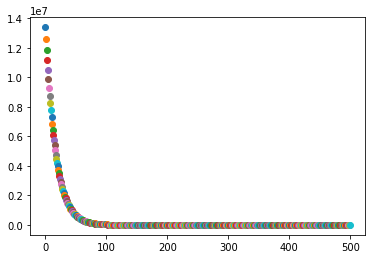

In [ ]:
theata  = training_linear(X, Y,theata, alpha= .03, no_of_iteration= 500)

In [ ]:
print(X_test)
X_test.shape

[[ 1.          1.41899979 -1.10382181 ... -0.69517339 -0.19489326
  -0.97652993]
 [ 1.          1.66716943 -0.02590781 ...  0.96093801  0.74538325
  -0.83992295]
 [ 1.          0.34624395 -0.65815272 ... -1.60018835 -1.72859476
   1.26697399]
 ...
 [ 1.         -1.19217223  0.43234797 ... -0.251815   -0.88537381
   1.62494049]
 [ 1.         -1.05450277  0.36103178 ...  1.29391763 -0.97594245
  -0.64162   ]
 [ 1.          1.38329327 -0.50329733 ...  1.32789681 -0.10081834
  -1.33956845]]


(10000, 21)

In [ ]:
#def test_linear(X_test, Y_test, theata):
    
m_test = len(X_test)
    
#hypothesis
Y_Pred = np.dot(X_test, theata)
    
# cost
cost_test = (np.sum((Y_Pred - Y_test)**2))/(2*m_test)
    
# ploting 
print(cost_test)

2794.587945445936


In [ ]:
#r2 score for test
def r_score(test, pred):
  deno = np.sum((np.mean(test) - test)**2)
  nemo = np.sum((pred - test)**2)
  
  r2_score = 1 - (nemo/deno)
  return r2_score

In [ ]:
r_score(Y_test, Y_Pred)

0.9997690408858375